In [1]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry

In [2]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

import pandas as pd
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



#from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
#from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
df = pd.read_csv('data/CSVData.csv', encoding = "ISO-8859-1")
df.head(10)
#read the dataset file into a dataframe
#display the head() of the dataframe

Keyword  tweet_id     author_id                created_at          place_id  \
0    nasa  1.34E+18  8.824561e+08  2020-12-31T23:46:56.000Z  6504ec137a7160ee   
1    nasa  1.34E+18  8.824561e+08  2020-12-31T23:40:33.000Z  6504ec137a7160ee   
2    nasa  1.34E+18  3.506291e+08  2020-12-31T23:28:15.000Z  1c69a67ad480e1b1   
3    nasa  1.34E+18  1.040000e+18  2020-12-31T23:23:05.000Z  300bcc6e23a88361   
4    nasa  1.34E+18  1.569173e+07  2020-12-31T23:20:40.000Z  b39bbbbd69b97fc0   
5    nasa  1.34E+18  1.160000e+18  2020-12-31T23:14:07.000Z  e0060cda70f5f341   
6    nasa  1.34E+18  1.002513e+09  2020-12-31T22:57:25.000Z  00d511d335cd9fb6   
7    nasa  1.34E+18  4.540296e+08  2020-12-31T22:29:20.000Z  01a9a39529b27f36   
8    nasa  1.34E+18  3.802000e+09  2020-12-31T22:02:57.000Z  00404cc8084d1f41   
9    nasa  1.34E+18  2.971735e+09  2020-12-31T22:02:33.000Z  04cb31bae3b3af93   

                                          tweet_text  
0  Moon by 2024 no more? NASA's Artemis deadline ...  
1  Chaos at the Heart of the Orion Nebula https:/...  
2  Just posted a photo @ NASA Galaxy Lights https...  
3  NASA Approves Heliophysics Missions to Explore...  
4      Some how- your right. https://t.co/O7gllV926U  
5  Thank you for all the hope of a new year you b...  
6  5/ Our goal is to deploy a college robotics pr...  
7  Everyone is different. Respect everyoneâs se...  
8  @TouchofModern #Touch love many your items B U...  
9  This is definitely the most productive NYE any...

In [4]:
print(df.shape[0])

52641


In [5]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/onercelepcikay/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True


*****Year: 2010*****
Total Tweets:  488
Positive Tweets:  182  % 37.3
Negative Tweets:  66  % 13.5
Neutral Tweets:  240  % 49.2


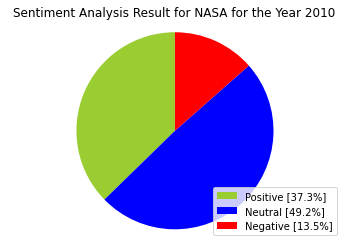


*****Year: 2011*****
Total Tweets:  1056
Positive Tweets:  362  % 34.3
Negative Tweets:  117  % 11.1
Neutral Tweets:  577  % 54.6


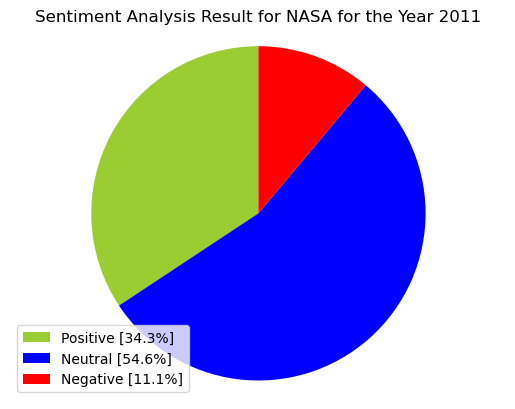


*****Year: 2012*****
Total Tweets:  1198
Positive Tweets:  467  % 39.0
Negative Tweets:  150  % 12.5
Neutral Tweets:  581  % 48.5


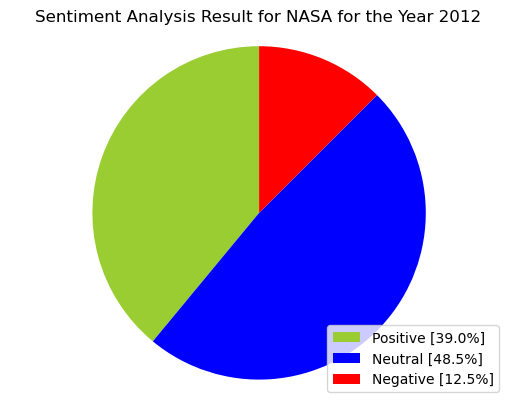


*****Year: 2013*****
Total Tweets:  1165
Positive Tweets:  456  % 39.1
Negative Tweets:  143  % 12.3
Neutral Tweets:  566  % 48.6


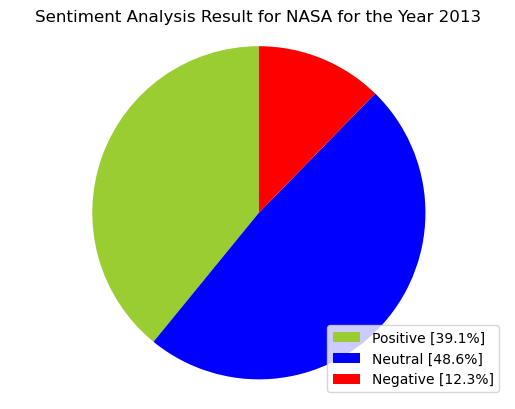


*****Year: 2014*****
Total Tweets:  1318
Positive Tweets:  482  % 36.6
Negative Tweets:  176  % 13.4
Neutral Tweets:  660  % 50.1


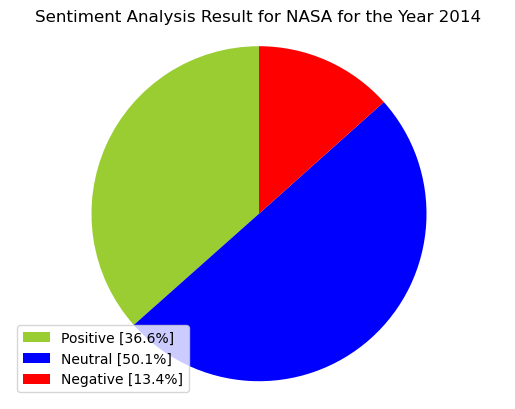


*****Year: 2015*****
Total Tweets:  1306
Positive Tweets:  452  % 34.6
Negative Tweets:  153  % 11.7
Neutral Tweets:  701  % 53.7


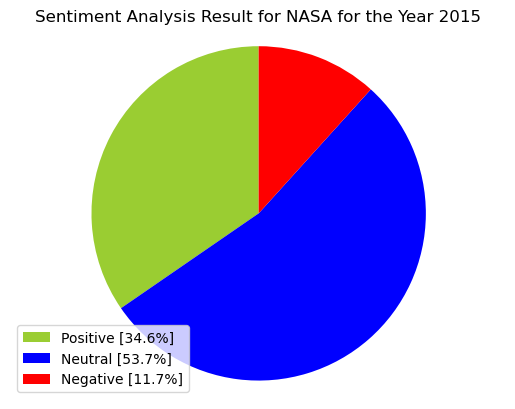


*****Year: 2016*****
Total Tweets:  1285
Positive Tweets:  486  % 37.8
Negative Tweets:  200  % 15.6
Neutral Tweets:  599  % 46.6


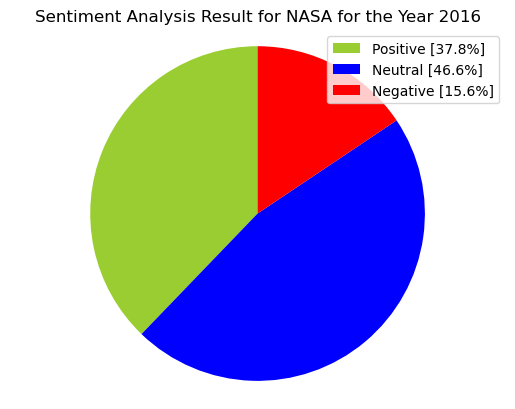


*****Year: 2017*****
Total Tweets:  1240
Positive Tweets:  511  % 41.2
Negative Tweets:  164  % 13.2
Neutral Tweets:  565  % 45.6


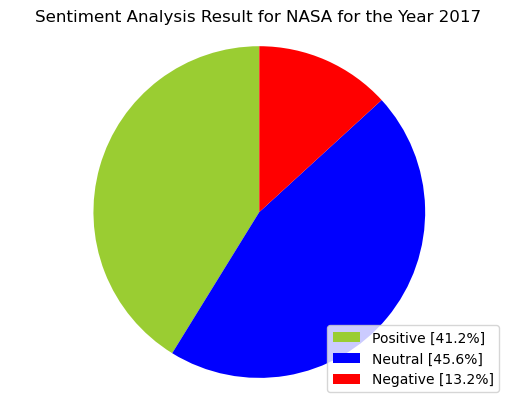


*****Year: 2018*****
Total Tweets:  1356
Positive Tweets:  548  % 40.4
Negative Tweets:  223  % 16.4
Neutral Tweets:  585  % 43.1


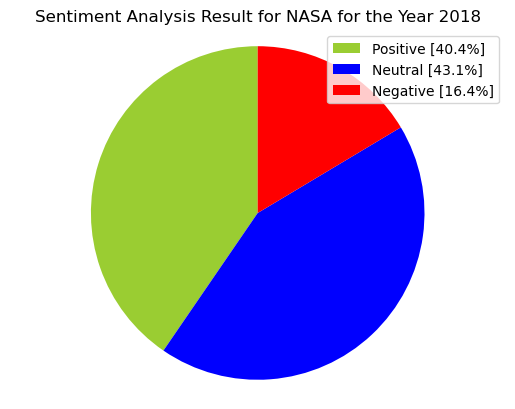


*****Year: 2019*****
Total Tweets:  1300
Positive Tweets:  532  % 40.9
Negative Tweets:  167  % 12.8
Neutral Tweets:  601  % 46.2


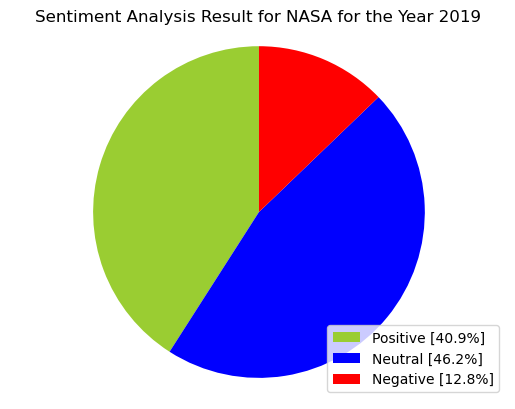


*****Year: 2020*****
Total Tweets:  1332
Positive Tweets:  574  % 43.1
Negative Tweets:  206  % 15.5
Neutral Tweets:  552  % 41.4


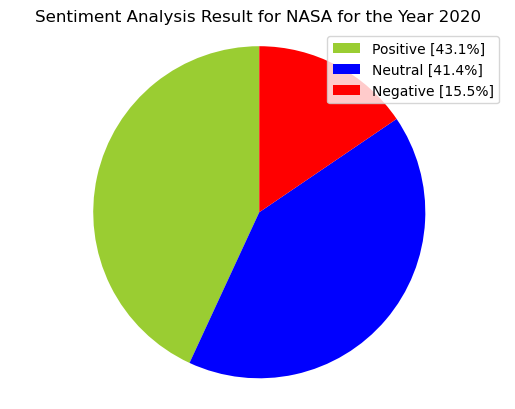

    year       pos       neg      diff
0   2010  0.372951  0.135246  0.237705
1   2011  0.342803  0.110795  0.232008
2   2012  0.389816  0.125209  0.264608
3   2013  0.391416  0.122747  0.268670
4   2014  0.365706  0.133536  0.232170
5   2015  0.346095  0.117152  0.228943
6   2016  0.378210  0.155642  0.222568
7   2017  0.412097  0.132258  0.279839
8   2018  0.404130  0.164454  0.239676
9   2019  0.409231  0.128462  0.280769
10  2020  0.430931  0.154655  0.276276


In [6]:
cols = ['year','pos','neg','diff']
lst = []


for year in range (2010,2021): 
    rows=0 
    positive = 0 
    negative = 0 
    neutral = 0 
    polarity = 0 
    tweet_list = [] 
    neutral_list = [] 
    negative_list = [] 
    positive_list = [] 
    startdate = str(year)+"-1-1" 
    stopdate = str(year)+"-12-31" 
    filterdate = (df["created_at"] >= startdate ) & (df["created_at"] <= stopdate) 
    df_filtered= df.loc[filterdate] 
    size = df_filtered.shape[0]
    # print(size) 
    rows = rows+size# print(rows)# print(startdate+ " .. "+ stopdate + " --> " +str(size))

    noOfTweet = size
    df_tweets = df_filtered ['tweet_text']
    
    for tweet in df_tweets: 

        #print("Type of tweet: ", type(tweet)) 
        tweet_list.append(tweet) 
        analysis = TextBlob(tweet) 
        score = SentimentIntensityAnalyzer().polarity_scores(tweet) 
        neg = score['neg'] 
        neu = score['neu'] 
        pos = score['pos'] 
        comp = score['compound'] 
        polarity += analysis.sentiment.polarity 

        if neg > pos: 
            negative_list.append(tweet) 
            negative += 1 
        elif pos > neg: 
            positive_list.append(tweet) 
            positive += 1 
        elif pos == neg: 
            neutral_list.append(tweet) 
            neutral += 1 

    positive_per = 100 * float(positive)/float(noOfTweet)
    negative_per = 100 * float(negative)/float(noOfTweet)
    neutral_per = 100 * float(neutral)/float(noOfTweet)
    polarity_per = 100 * float(polarity)/float(noOfTweet)

    lst.append ([year, positive_per/100, negative_per/100, positive_per/100 - negative_per/100])

    positive_per = format(positive_per, '.1f') 
    negative_per = format(negative_per, '.1f') 
    neutral_per = format(neutral_per, '.1f')

    
    #Number of Tweets (Total, Positive, Negative, Neutral) 
    tweet_list = pd.DataFrame(tweet_list) 
    neutral_list = pd.DataFrame(neutral_list) 
    negative_list = pd.DataFrame(negative_list) 
    positive_list = pd.DataFrame(positive_list) 
    print("\n*****Year: "+startdate[:4]+"*****") 
    print("Total Tweets: ",len(tweet_list)) 
    print("Positive Tweets: ",len(positive_list), " %", positive_per) 
    print("Negative Tweets: ", len(negative_list), " %", negative_per) 
    print("Neutral Tweets: ",len(neutral_list), " %", neutral_per)


    #Creating PieCart 
    labels = ['Positive ['+str(positive_per)+'%]' , 'Neutral ['+str(neutral_per)+'%]', 'Negative ['+str(negative_per)+'%]'] 
    sizes = [positive_per, neutral_per, negative_per] 
    colors = ['yellowgreen', 'blue','red'] 
    patches, texts = plt.pie(sizes,colors=colors, startangle=90) 
    plt.style.use('default') 
    plt.legend(labels) 
    plt.title("Sentiment Analysis Result for NASA for the Year "+startdate[:4] ) 
    plt.axis('equal') 
    plt.show() 

              
df_summary = pd.DataFrame(lst, columns=cols)
print(df_summary)
df_summary.to_csv ('Sentiments_NASA.csv', index = False, header=True)

In [7]:
df.shape[0]

pos=0.35
neg =0.17

cols = ['year','pos','neg']


In [8]:
df_summary.append(df_values)

NameError: name 'df_values' is not defined

In [ ]:
ax = plt.gca()

df_summary.plot(kind='line',x='year',y='pos',ax=ax)
df_summary.plot(kind='line',x='year',y='neg', color='green', ax=ax)
df_summary.plot(kind='line',x='year',y='diff', color='red', ax=ax)

plt.show()